In [1]:
import benchmark_functions as bf
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams["text.usetex"] = True
np.random.seed(14159)

# BigGAN images

## Initialisation

In [2]:
folder, classes = 'data/', ['collie', 'tabby']
k, X, y = bf.BigGAN_images(folder, classes) # load data
M = 1000000 # memory
c_err = np.zeros(5) # classification error

100%|██████████| 20000/20000 [01:03<00:00, 313.74it/s]


## Computations

### Offline

In [3]:
# Kernel Spectral Clustering (KSC)
c_err[0] = bf.offline(k, X, y)

In [4]:
# Sketching
# c_err[1] = bf.sketching(k, 10*k*X.shape[1]*(X.shape[1]+1), X, y, verbose=True, n_repetitions=1) # /!\ very memory-demanding

### Limited memory

n = 633
L = 216


100%|██████████| 20000/20000 [1:01:31<00:00,  5.42it/s]


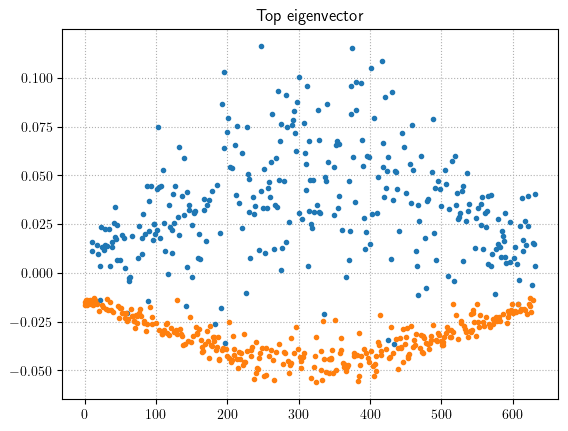

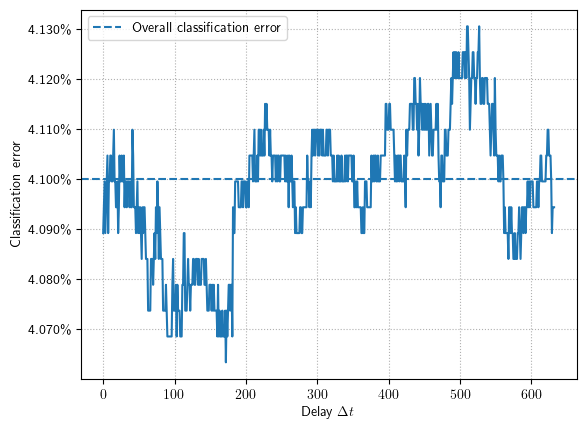

In [5]:
# Online Kernel Spectral Clustering (Online KSC)
c_err[2] = bf.streaming(k, M, X, y, verbose=True)

In [6]:
# Batch Kernel Spectral Clustering (Batch KSC)
c_err[3] = bf.batch(k, M, X, y, verbose=True)

L' = 237


100%|██████████| 84/84 [00:00<00:00, 137.44it/s]


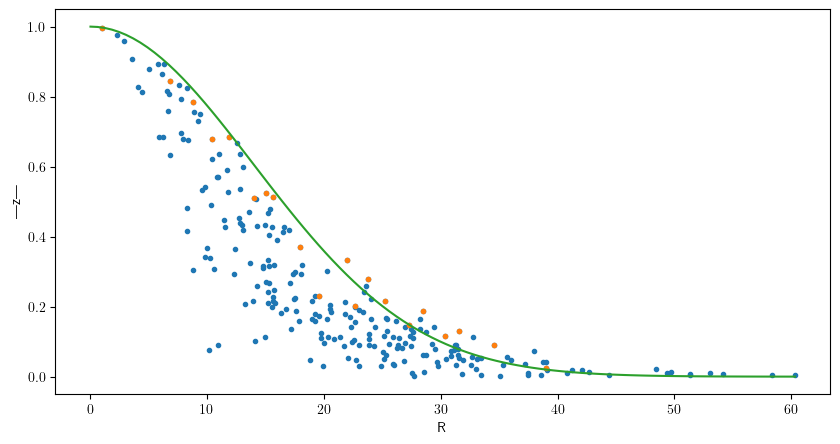

Computing sketch... Done.
Fitting k-means... Done.


In [7]:
# Sketching
c_err[4] = bf.sketching(k, M, X, y, verbose=True)

## Results

In [8]:
print("# Offline")
print("KSC        \t {:.5%}".format(c_err[0]))
# print("Sketching  \t {:.5%}".format(c_err[1]))
print("# Limited memory")
print("Online KSC \t {:.5%}".format(c_err[2]))
print("Batch KSC  \t {:.5%}".format(c_err[3]))
print("Sketching  \t {:.5%}".format(c_err[4]))

# Offline
KSC        	 4.07000%
# Limited memory
Online KSC 	 4.10000%
Batch KSC  	 4.07000%
Sketching  	 50.00000%


# BigGAN images + noise

## Initialisation

In [9]:
noise_level = 70
X += noise_level*np.random.randn(*X.shape) # add noise
c_err = np.zeros(5) # classification error

## Computations

### Offline

In [10]:
# Kernel Spectral Clustering (KSC)
c_err[0] = bf.offline(k, X, y)

In [11]:
# Sketching
# c_err[1] = bf.sketching(k, 10*k*X.shape[1]*(X.shape[1]+1), X, y, verbose=True, n_repetitions=1) # /!\ very memory-demanding

### Limited memory

n = 633
L = 216


100%|██████████| 20000/20000 [1:03:19<00:00,  5.26it/s]


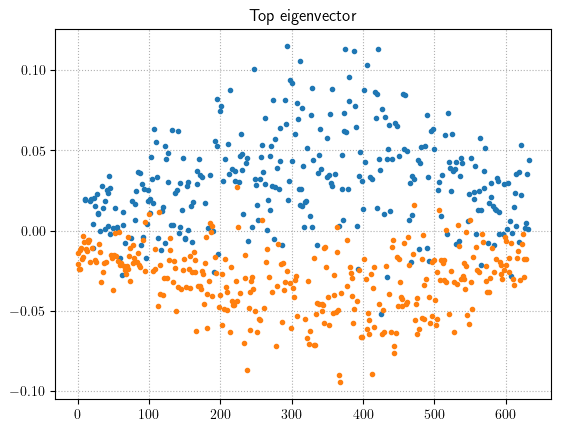

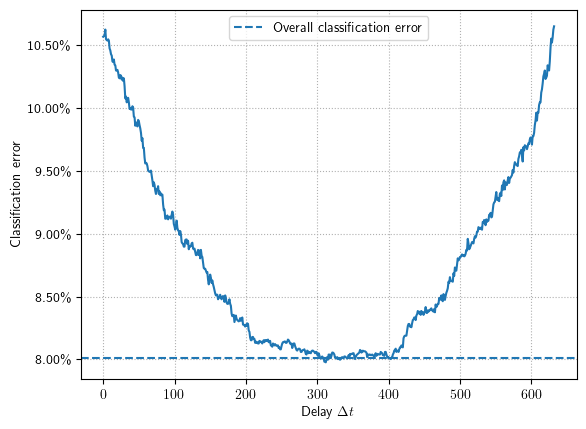

In [12]:
# Online Kernel Spectral Clustering (Online KSC)
c_err[2] = bf.streaming(k, M, X, y, verbose=True)

In [13]:
# Batch Kernel Spectral Clustering (Batch KSC)
c_err[3] = bf.batch(k, M, X, y, verbose=True)

L' = 237


100%|██████████| 84/84 [00:00<00:00, 105.89it/s]


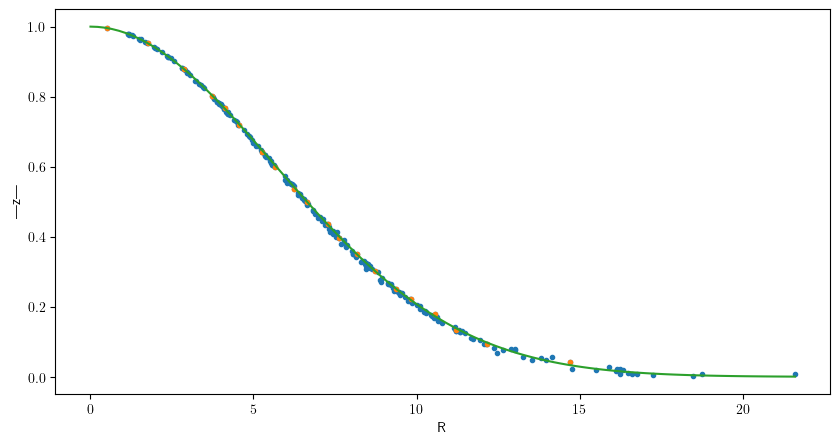

Computing sketch... Done.
Fitting k-means... Done.


In [14]:
# Sketching
c_err[4] = bf.sketching(k, M, X, y, verbose=True)

## Results

In [15]:
print("# Offline")
print("KSC        \t {:.5%}".format(c_err[0]))
# print("Sketching  \t {:.5%}".format(c_err[1]))
print("# Limited memory")
print("Online KSC \t {:.5%}".format(c_err[2]))
print("Batch KSC  \t {:.5%}".format(c_err[3]))
print("Sketching  \t {:.5%}".format(c_err[4]))

# Offline
KSC        	 5.36500%
# Limited memory
Online KSC 	 8.01000%
Batch KSC  	 10.49000%
Sketching  	 49.68000%


# Fashion-MNIST

## Initialisation

In [16]:
classes = ['Coat', 'Ankle boot']
k, X, y = bf.FashionMNIST_images(classes) # load data
M = 24000 # memory
c_err = np.zeros(5) # classification error

c:\Users\hug97\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Computations

### Offline

In [17]:
# Kernel Spectral Clustering (KSC)
c_err[0] = bf.offline(k, X, y)

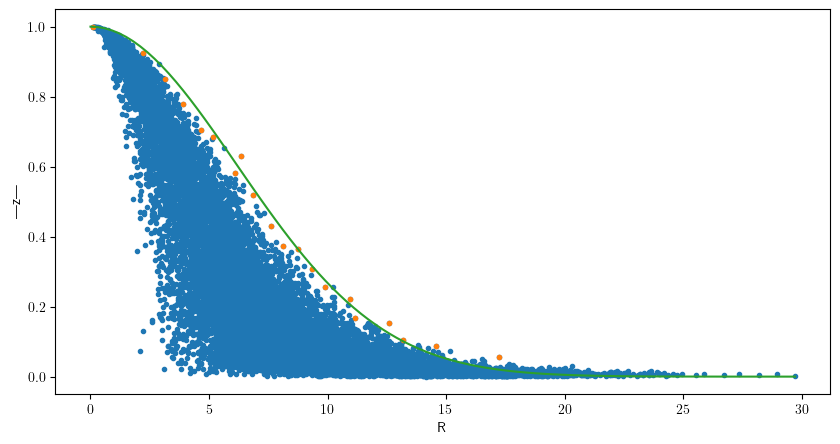

Computing sketch... Done.
Fitting k-means... Done.


In [18]:
# Sketching
c_err[1] = bf.sketching(k, 10*k*X.shape[1]*(X.shape[1]+1), X, y, verbose=True, n_repetitions=1)

### Limited memory

n = 82
L = 28


100%|██████████| 14000/14000 [00:46<00:00, 301.28it/s]


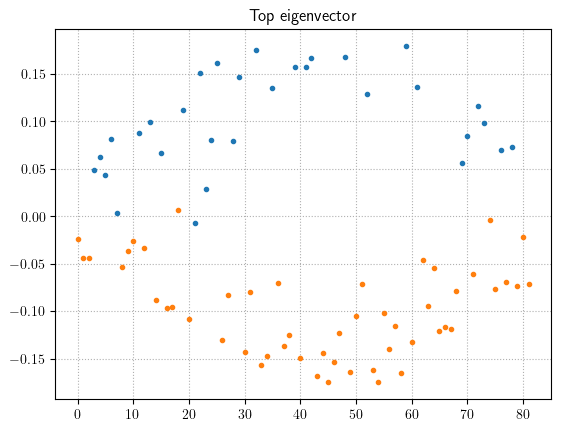

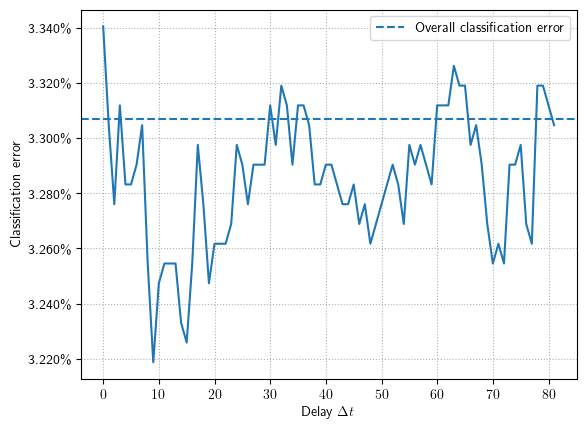

In [19]:
# Online Kernel Spectral Clustering (Online KSC)
c_err[2] = bf.streaming(k, M, X, y, verbose=True)

In [20]:
# Batch Kernel Spectral Clustering (Batch KSC)
c_err[3] = bf.batch(k, M, X, y, verbose=True)

L' = 30


100%|██████████| 466/466 [00:00<00:00, 1356.01it/s]


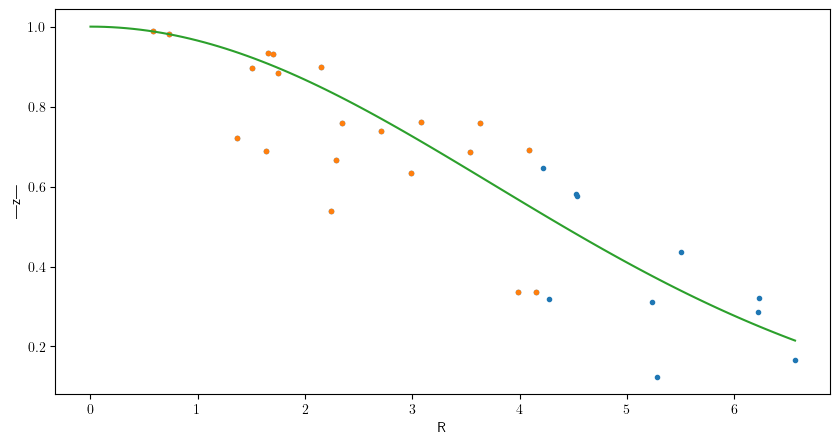

Computing sketch... Done.
Fitting k-means... Done.


In [21]:
# Sketching
c_err[4] = bf.sketching(k, M, X, y, verbose=True)

## Results

In [22]:
print("# Offline")
print("KSC        \t {:.5%}".format(c_err[0]))
print("Sketching  \t {:.5%}".format(c_err[1]))
print("# Limited memory")
print("Online KSC \t {:.5%}".format(c_err[2]))
print("Batch KSC  \t {:.5%}".format(c_err[3]))
print("Sketching  \t {:.5%}".format(c_err[4]))

# Offline
KSC        	 3.25000%
Sketching  	 5.35714%
# Limited memory
Online KSC 	 3.30714%
Batch KSC  	 3.37857%
Sketching  	 33.12857%
